In [1]:
#下載檔案

import requests
CSV_URL = "https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=csv"
response = requests.get(CSV_URL,stream=True)
filename = '空氣品質指標.csv'
with open(filename, 'wb') as fd:
    for chunk in response.iter_content(chunk_size=128):
        fd.write(chunk)
print("下載完成")

下載完成


In [2]:
#處理資料
import pandas as pd
import numpy as np

df=pd.read_csv('空氣品質指標.csv')
df

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,...,NO,WindSpeed,WindDirec,PublishTime,PM2.5_AVG,PM10_AVG,SO2_AVG,Longitude,Latitude,SiteId
0,屏東(枋寮),屏東縣,48,NaN,良好,3.3,0.33,0.2,72,52,...,0.3,0.4,278,2021/02/21 16:00:00,15,38,1,120.591167,22.370947,313
1,新竹(北區),新竹市,99,細懸浮微粒,普通,2.0,0.33,0.4,62.8,49,...,0.6,1,191,2021/02/21 16:00:00,35,48,1,120.962314,24.819533,312
2,新北(樹林),新北市,108,細懸浮微粒,對敏感族群不健康,2.6,0.43,0.5,77.7,55,...,0.7,0.9,360,2021/02/21 16:00:00,38,-,1,121.383528,24.949028,311
3,臺南(北門),臺南市,78,細懸浮微粒,普通,1.4,0.26,0.3,49.6,44,...,1.3,2.4,275,2021/02/21 16:00:00,27,44,1,120.124444,23.264722,310
4,屏東(琉球),屏東縣,101,臭氧八小時,對敏感族群不健康,4.1,0.39,0.3,86.7,71,...,0.7,2.4,313,2021/02/21 16:00:00,21,38,2,120.377220,22.352220,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,土城,新北市,98,細懸浮微粒,普通,4.3,0.48,0.6,101.2,69,...,1.6,2.6,309,2021/02/21 16:00:00,35,48,3,121.451861,24.982528,5
81,新店,新北市,100,臭氧八小時,普通,2.5,0.57,0.5,107.9,70,...,0.7,2.8,314,2021/02/21 16:00:00,27,37,2,121.537778,24.977222,4
82,萬里,新北市,67,臭氧八小時,普通,3.5,0.35,0.3,85.6,60,...,0.8,3.7,50,2021/02/21 16:00:00,22,34,3,121.689881,25.179667,3
83,汐止,新北市,61,細懸浮微粒,普通,5.0,0.39,0.5,69.6,50,...,3.1,2,35,2021/02/21 16:00:00,20,30,2,121.642300,25.067131,2


In [3]:
final_df = df.loc[:,['County', 'SiteName', 'AQI','PublishTime','PM2.5_AVG']]
final_df

,County,SiteName,AQI,PublishTime,PM2.5_AVG
0,屏東縣,屏東(枋寮),48,2021/02/21 16:00:00,15
1,新竹市,新竹(北區),99,2021/02/21 16:00:00,35
2,新北市,新北(樹林),108,2021/02/21 16:00:00,38
3,臺南市,臺南(北門),78,2021/02/21 16:00:00,27
4,屏東縣,屏東(琉球),101,2021/02/21 16:00:00,21
...,...,...,...,...,...
80,新北市,土城,98,2021/02/21 16:00:00,35
81,新北市,新店,100,2021/02/21 16:00:00,27
82,新北市,萬里,67,2021/02/21 16:00:00,22
83,新北市,汐止,61,2021/02/21 16:00:00,20


In [4]:
final_df.columns = ['縣市','位置','空氣品質','發佈時間','PM2.5']
final_df

,縣市,位置,空氣品質,發佈時間,PM2.5
0,屏東縣,屏東(枋寮),48,2021/02/21 16:00:00,15
1,新竹市,新竹(北區),99,2021/02/21 16:00:00,35
2,新北市,新北(樹林),108,2021/02/21 16:00:00,38
3,臺南市,臺南(北門),78,2021/02/21 16:00:00,27
4,屏東縣,屏東(琉球),101,2021/02/21 16:00:00,21
...,...,...,...,...,...
80,新北市,土城,98,2021/02/21 16:00:00,35
81,新北市,新店,100,2021/02/21 16:00:00,27
82,新北市,萬里,67,2021/02/21 16:00:00,22
83,新北市,汐止,61,2021/02/21 16:00:00,20


In [6]:
def getStatus(ser):
    if ser['空氣品質'] <= 50:
        ser['狀態'] = '良好'
    elif ser['空氣品質'] <= 100:
        ser['狀態'] = '普通'
    elif ser['空氣品質'] <= 150:
        ser['狀態'] = '對敏感族群不健康'
    elif ser['空氣品質'] <= 200:
        ser['狀態'] = '對所有族群不健康'
    elif ser['空氣品質'] <= 300:
        ser['狀態'] = '非常不健康'
    else:
        ser['狀態'] = '危害'
    return ser
    
df1=final_df.apply(getStatus,axis=1)

In [7]:
df1

,縣市,位置,空氣品質,發佈時間,PM2.5,狀態
0,屏東縣,屏東(枋寮),48,2021/02/21 16:00:00,15,良好
1,新竹市,新竹(北區),99,2021/02/21 16:00:00,35,普通
2,新北市,新北(樹林),108,2021/02/21 16:00:00,38,對敏感族群不健康
3,臺南市,臺南(北門),78,2021/02/21 16:00:00,27,普通
4,屏東縣,屏東(琉球),101,2021/02/21 16:00:00,21,對敏感族群不健康
...,...,...,...,...,...,...
80,新北市,土城,98,2021/02/21 16:00:00,35,普通
81,新北市,新店,100,2021/02/21 16:00:00,27,普通
82,新北市,萬里,67,2021/02/21 16:00:00,22,普通
83,新北市,汐止,61,2021/02/21 16:00:00,20,普通


In [8]:
df1.index = df1['縣市'] + df1['位置']
df1

,縣市,位置,空氣品質,發佈時間,PM2.5,狀態
屏東縣屏東(枋寮),屏東縣,屏東(枋寮),48,2021/02/21 16:00:00,15,良好
新竹市新竹(北區),新竹市,新竹(北區),99,2021/02/21 16:00:00,35,普通
新北市新北(樹林),新北市,新北(樹林),108,2021/02/21 16:00:00,38,對敏感族群不健康
臺南市臺南(北門),臺南市,臺南(北門),78,2021/02/21 16:00:00,27,普通
屏東縣屏東(琉球),屏東縣,屏東(琉球),101,2021/02/21 16:00:00,21,對敏感族群不健康
...,...,...,...,...,...,...
新北市土城,新北市,土城,98,2021/02/21 16:00:00,35,普通
新北市新店,新北市,新店,100,2021/02/21 16:00:00,27,普通
新北市萬里,新北市,萬里,67,2021/02/21 16:00:00,22,普通
新北市汐止,新北市,汐止,61,2021/02/21 16:00:00,20,普通


In [9]:
df2 = df1.drop(['縣市','位置'],axis=1)
df2

,空氣品質,發佈時間,PM2.5,狀態
屏東縣屏東(枋寮),48,2021/02/21 16:00:00,15,良好
新竹市新竹(北區),99,2021/02/21 16:00:00,35,普通
新北市新北(樹林),108,2021/02/21 16:00:00,38,對敏感族群不健康
臺南市臺南(北門),78,2021/02/21 16:00:00,27,普通
屏東縣屏東(琉球),101,2021/02/21 16:00:00,21,對敏感族群不健康
...,...,...,...,...
新北市土城,98,2021/02/21 16:00:00,35,普通
新北市新店,100,2021/02/21 16:00:00,27,普通
新北市萬里,67,2021/02/21 16:00:00,22,普通
新北市汐止,61,2021/02/21 16:00:00,20,普通


In [17]:
df3 = df2[['空氣品質','PM2.5']]
df3

,空氣品質,PM2.5
屏東縣屏東(枋寮),48,15
新竹市新竹(北區),99,35
新北市新北(樹林),108,38
臺南市臺南(北門),78,27
屏東縣屏東(琉球),101,21
...,...,...
新北市土城,98,35
新北市新店,100,27
新北市萬里,67,22
新北市汐止,61,20


<IPython.core.display.Javascript object>


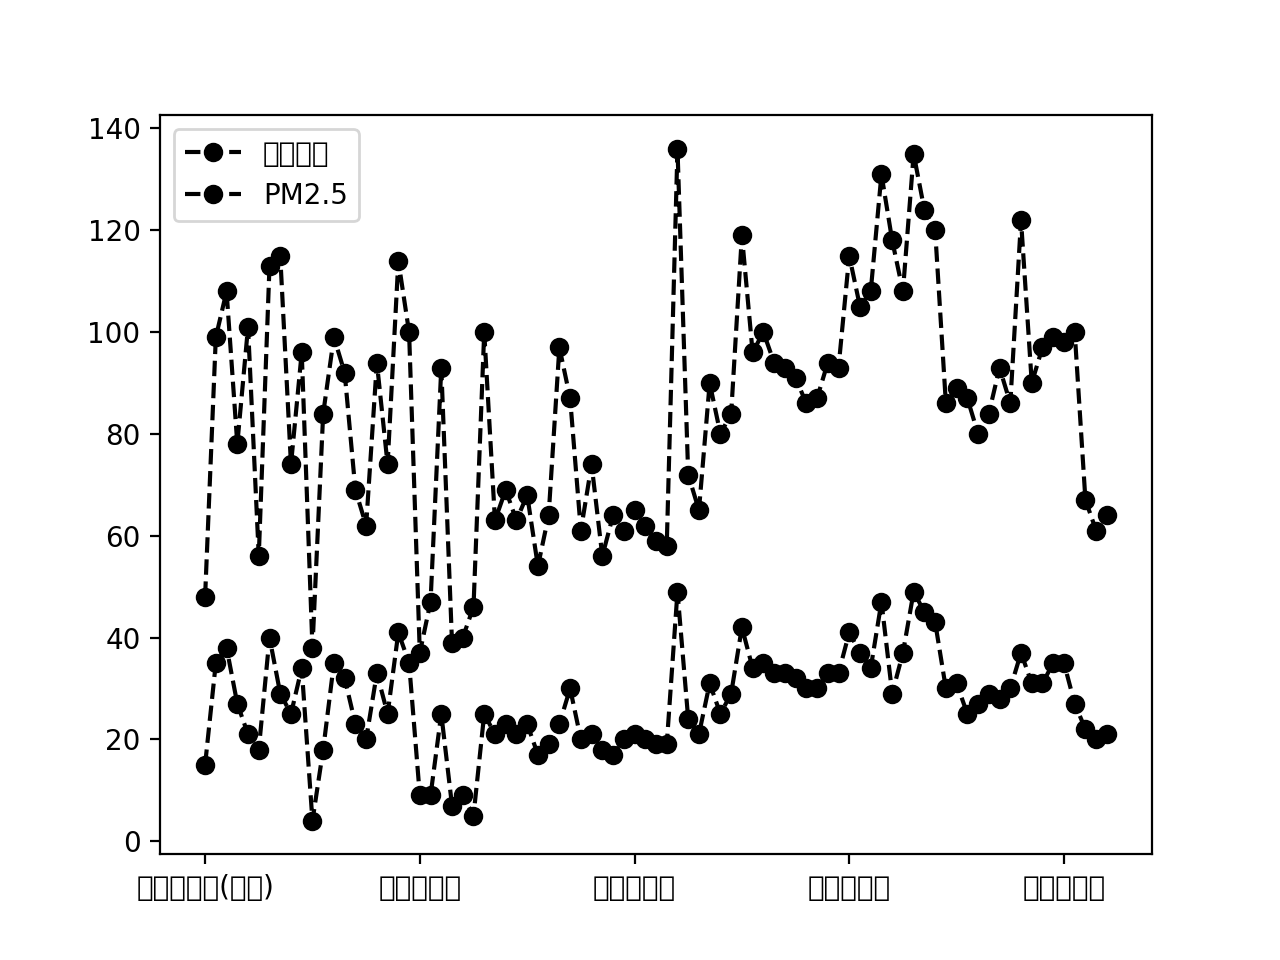

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (85).

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=8)

figure, ax1 = plt.subplots()
df3[].plot(ax=ax1,style='ko--')
ax1.set_xticklabels(df3.index,fontproperties=font)